# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [223]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

/var/folders/wb/nqxcmhpx3pb0m8dzscg9z4zr0000gn/T/ipykernel_1865/577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [224]:
# Q1

pd.set_option('display.max_columns', None)
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [225]:
# Q2

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [226]:
#Q2

s1 = df.isnull().sum()
s2 = round(df.isnull().sum() / len(df) *100, 1)

null_df = pd.concat([s1, s2],axis = 1)
null_df.columns = ['missing_num', 'missing_%']
null_df.drop(null_df[null_df['missing_num'] == 0].index, inplace=True)
null_df = null_df.sort_values('missing_num', ascending=False)
null_df

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

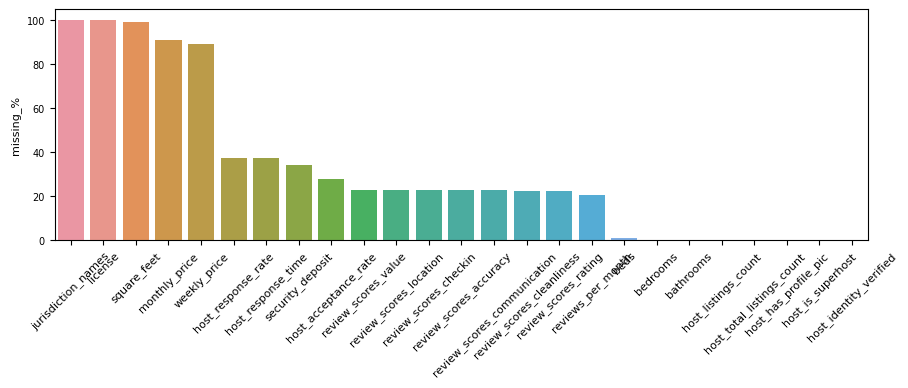

In [227]:
# Q3

fig = plt.figure(figsize=(10.5, 3))
sns.barplot( y= null_df['missing_%'], x=null_df.index)
plt.ylabel('missing_%', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [228]:
# Q4

df[df['beds'].isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [229]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [230]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

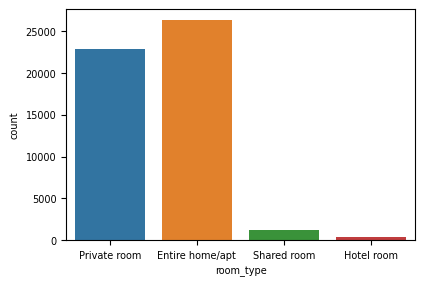

In [232]:
# Q5

fig = plt.figure(figsize=(4.5, 3))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
sns.countplot(x=df['room_type'])
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

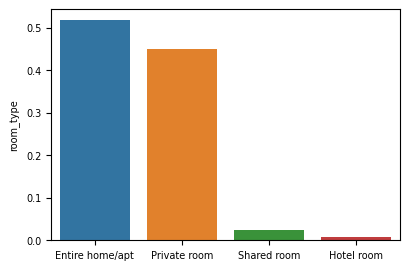

In [233]:
# Q6

df_room = df.groupby('room_type').size()
df_room = df_room/sum(df_room)
df_room = df_room.sort_values(ascending=False)
df_room = pd.DataFrame(df_room)
df_room.reset_index(inplace=True)

fig = plt.figure(figsize=(4.5, 3))
plt.rc('xtick', labelsize=7) 
sns.barplot(x='room_type', y=0, data=df_room)
plt.ylabel('room_type', fontsize=7)
plt.xlabel('')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

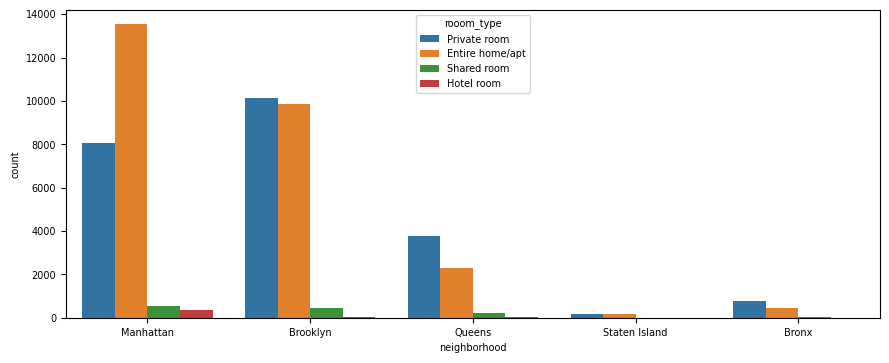

In [234]:
# Q7

fig = plt.figure(figsize=(10.5, 4))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
sns.countplot(data=df, hue='room_type', x='neighborhood')
plt.legend(fontsize=7, title='rooom_type', title_fontsize=7, loc='upper center')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

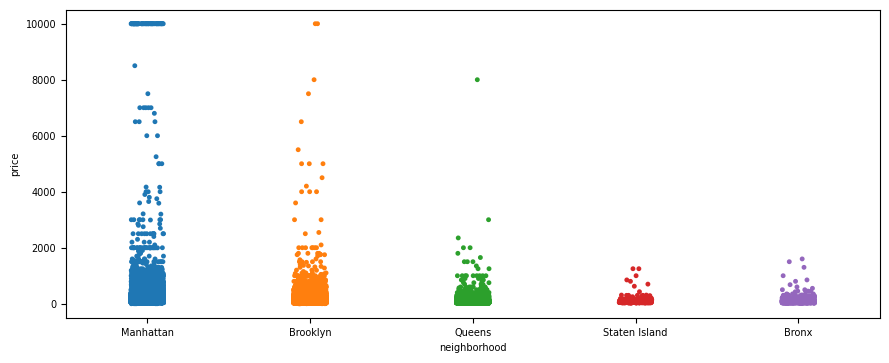

In [235]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요

fig = plt.figure(figsize=(10.5, 4))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
sns.stripplot(x='neighborhood', y='price', hue= 'neighborhood', data=df, s=3.5).get_legend().remove()
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

# Q9

Q5, Q6의 그래프를 보아 에어비엔비의 방 종류에는 방값이 비교적 비싼 호텔이나 다른 사람과 함께 사용하는 shared room 보다는, 개인적인 방 또는 집 전체의 형태가 많다. 이를 보아, 개인이 소유하거나 거주하는 공간을 에어비앤비로 내놓는 경우가 대다수라고 생각할 수 있다. 

Q7의 지역별 room_type 그래프를 보면 전체 방 종류와 비슷하게 모든 지역에서 Entire home/apt와 Private room 의 종류의 방이 많다는 것을 알 수 있다. 다만, Mahattan과 Brooklyn과 같은 지역은 타 지역에 비교적 전체 방의 개수가 많은데, 이는 대도시의 중심이고 관광 도시일수록 에어비앤비의 수요와 공급이 높아진다고 유추할 수 있다.

이어서 Q8을 보았을 때도 Mahattan과 Brooklyn과 같은 유명 관광지 및 중심지일수록 에어비앤비에 대한 수요가 높기 때문에 가격이 비교적 높게 측정된 것을 볼 수 있다. 에어비앤비의 가격은 해당 지역의 물가를 반영할 수 밖에 없기 때문에 에어비앤비 가격 분포를 통해 해당 지역의 주택 가격 정도 또한 예상해볼 수 있다.

특히 Mahattan은 뉴욕 대도시권의 중심으로 관광지로 유명하기도 하고 주택 가격이 매우 비쌀 것이 때문에 단기로 집을 임대하는 사람들이 많아 방 단위로 방을 빌리는 사람보다 Entire home/apt을 이용하는 사람이 많다고 생각할 수 있다. Q8에서 Mahattan의 방 중 $10000가 넘는 방이 많은 것도, 방 단위보다 집 전체 단위의 에어비앤비를 이용하는 것이 더 비용이 비싸기 때문이라고 생각할 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

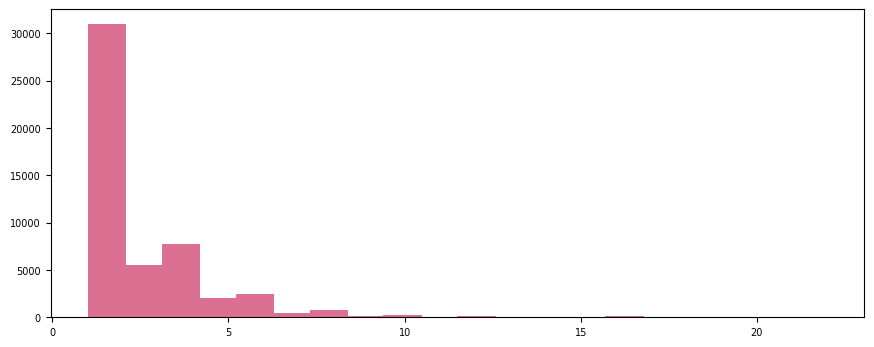

In [236]:
# Q10

fig = plt.figure(figsize=(10.5, 4))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
plt.hist(df['accommodates'], width=1.1, bins=20, color='palevioletred')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

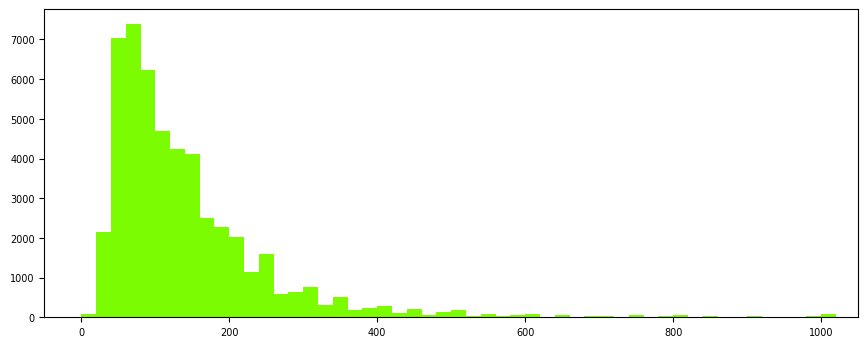

In [265]:
# Q11

fig = plt.figure(figsize=(10.5, 4))
plt.rc('xtick', labelsize=7) 
plt.rc('ytick', labelsize=7) 
plt.hist(df['price'],color='lawngreen', bins=500)
plt.xlim([-50,1050])
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [327]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

/var/folders/wb/nqxcmhpx3pb0m8dzscg9z4zr0000gn/T/ipykernel_1865/577296706.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [336]:
#Q12

# Q2의 결측치 개수와 비율을 나타내는 df 만드는 코드 이용
s1 = df.isnull().sum()
s2 = round(df.isnull().sum() / len(df) *100, 1)

null_df = pd.concat([s1, s2],axis = 1)
null_df.columns = ['missing_num', 'missing_%']
null_df.drop(null_df[null_df['missing_num'] == 0].index, inplace=True)
null_df = null_df.sort_values('missing_num', ascending=False)


# 문제의 결측치 퍼센트에 따라 index 구분
idx_list_l = null_df[null_df['missing_%']<10].index
idx_list_h = null_df[null_df['missing_%']>=25].index
idx_list_m = null_df[(null_df['missing_%']>=10)&(null_df['missing_%']<25)].index

# 결측치가 25% 이상인 경우 column drop
for i in idx_list_h:
    df.drop(i, axis=1, inplace=True)
    
# 결측치가 10% 이상, 25% 미만인 경우 row drop
df.dropna(axis=0, subset=idx_list_m, inplace=True)

# 결측치가 10% 미만인 경우 dtype에 따라 중앙값 및 최빈값으로 대체
for i in idx_list_l:
    if df[i].dtypes == 'object':
        frequent = df[i].mode()
        df[i].fillna(frequent.values[0], inplace=True)
    else:
        median = df[i].median()
        df[i].fillna(median, inplace=True)


df.isnull().sum()

id                                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighborhood                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [356]:
#Q13-1) 
# 지표변수 (Indicator variables) 설정 : 에어비앤비 투숙객들의 별점으로 추정되는 'review_scores_rating'를 만족(Nice), 보통(Pleasant), 불만족(Bad)의 지표 변수로 추가해준다.
# 숙소에 대해 만족했는지 불만족했는지를 지표로 나타내면 만족했는지에 대해 더 직관적으로 만족도를 알 수 있을 것 같다.

scoring = []
for score in df['review_scores_rating']:
    if (score > 70):
        scoring.append('Nice')
    elif (30 <= score <= 70):
        scoring.append('Pleasant')
    else:
        scoring.append('Bad')

df['scoring'] = scoring

df['scoring'].value_counts()

Nice        38353
Pleasant      810
Bad           128
Name: scoring, dtype: int64

In [366]:
# 수치형 변수와 범주형 변수 데이터 프레임 구분하기 

col = df.columns
obj_col = []
num_col = []

for i in col:
    if df[i].dtypes == 'object':
        obj_col.append(i)
    else:
        num_col.append(i)
        
        
df_cat = df[obj_col]
df_num = df[num_col]

In [363]:
#Q13-2)
# 스케일링(Scaling) : df.describe()를 통해 수치형 변수들의 통계량을 확인했을 때, 변수별로 단위가 제각각인 것을 확인할 수 있었다. 
# -> StandardScaler 를 이용하여 모든 피처들의 데이터 분포와 범위를 표준정규분포를 따르도록 조정해준다.


from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
df_num = sd_scaler.fit_transform(df_num)
pd.DataFrame(df_num, columns=num_col)

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,-1.680016,-0.045422,-0.045422,0.456400,-0.707616,-0.483246,-0.338257,-1.567822,-0.491068,0.203301,-0.485292,0.050497,-0.005088,-0.610228,0.487986,0.837622,1.633505,0.292439,-0.380336,0.009501,-0.716015,-0.263613,0.353287,0.337178,0.533495,-0.412105,-0.569084
1,-1.679919,-0.106435,-0.106435,-0.777294,-0.210748,0.039602,-0.338257,-0.246473,2.082452,-0.176956,-0.485292,-0.275168,-0.005124,-0.442612,-0.542009,-0.619167,0.219228,5.254820,3.185470,-0.444770,-0.716015,-0.263613,0.353287,0.337178,0.533495,-1.477860,2.077931
2,-1.679820,-0.106435,-0.106435,0.349209,-0.526128,-0.483246,-0.338257,-0.246473,-0.491068,0.133401,0.330016,-0.166613,-0.005190,-0.945460,-0.971174,-0.990505,-0.916707,0.854218,-0.213189,-0.444770,0.450214,-0.263613,0.353287,0.337178,0.533495,-0.412105,-0.440707
3,-1.679819,-0.082030,-0.082030,-0.165491,-0.844819,-0.483246,-0.338257,-0.246473,-0.491068,-0.162976,-0.485292,-0.275168,-0.005124,1.568780,1.603814,1.580298,-0.096728,0.798040,-0.658915,0.009501,0.450214,0.660926,0.353287,0.337178,0.533495,0.653650,-0.459047
4,-1.679818,-0.106435,-0.106435,-0.745947,-0.132109,-0.483246,-0.338257,-0.246473,-0.491068,-0.258040,-0.485292,1.244602,-0.005124,1.568780,1.603814,1.580298,1.829097,0.329891,-0.603199,-0.444770,-1.882245,-1.188151,0.353287,0.337178,-0.799852,-0.412105,-0.569084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39286,1.664306,-0.118637,-0.118637,0.215354,2.662233,-0.483246,-0.338257,-0.246473,-0.491068,-0.316757,-0.485292,-0.275168,-0.005088,1.401164,1.517981,1.523169,-0.254705,-0.587681,-0.603199,0.690907,0.450214,0.660926,0.353287,0.337178,0.533495,0.653650,-0.190066
39287,1.665241,-0.106435,-0.106435,-0.753694,0.238938,-0.483246,-0.338257,-0.246473,-0.491068,-0.202120,-0.485292,-0.220891,-0.005190,1.401164,1.517981,1.523169,1.814051,-0.587681,-0.603199,0.690907,0.450214,0.660926,0.353287,0.337178,0.533495,0.653650,-0.190066
39288,1.667753,-0.118637,-0.118637,1.870608,0.160921,-0.483246,-0.338257,-0.246473,-0.491068,-0.272020,0.330016,-0.275168,-0.005088,-0.945460,0.015905,0.523412,1.550755,-0.568955,-0.547484,0.690907,0.450214,0.660926,0.353287,0.337178,0.533495,0.653650,0.421254
39289,1.669456,0.003388,0.003388,0.601244,-0.859926,0.039602,0.881610,1.074876,0.366772,0.077481,-0.485292,0.810382,-0.005088,1.401164,1.517981,1.523169,1.814051,-0.587681,-0.603199,0.690907,0.450214,0.660926,0.353287,0.337178,0.533495,0.653650,-0.190066


In [367]:
#Q13-3)
# 원-핫 인코딩(One-hot encoding) : 원-핫 인코딩을 통해 범주형 변수를 추후 모델링을 진행하기 위해 수치형으로 바꿔준다.

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
df_cat = onehot_encoder.fit_transform(df_cat)

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
